# PHYS 404 Homework 3 2/3/2023
## Question 1: 
## Calculate and plot the ratio F(n)/F(n-1) with respect to n using memorization method.

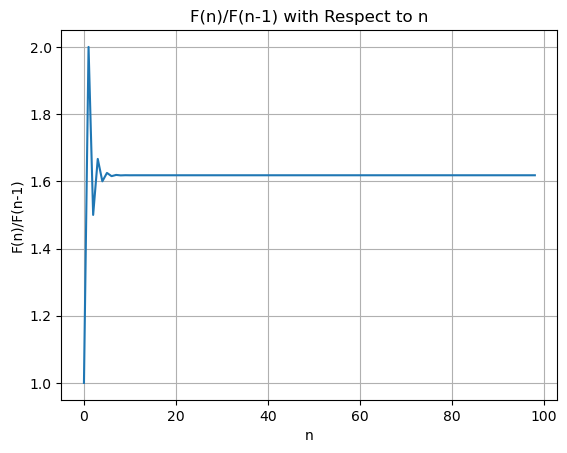

In [1]:
# Xuanyi Wu, PHYS 404, Homework 2

# import the matplotlib library 
import matplotlib.pyplot as plt
from numpy import * # import numpy library

# Memorization method for Fibonacci number given in the class
# which we already discussed
def fib3(n, table):
    # base case for 0 and 1
    if n == 0 or n == 1:
        table[n] = n
    # if the value has not been calculated, calculate it 
    if table[n] is None:
    # recursive calls: keep calling to find the base case
        table[n] = fib3(n-1, table)+fib3(n-2, table)  
    return table[n]

# set the range for n
n = 100
# populate array list, SIZE = 101
table = [None]*(n+1)
# initialize empty list for all the F(n)/F(n-1) value
fnOfnm1 = []
for i in range (2, n+1):
    fnOfnm1.append(fib3(i, table)/fib3(i-1,table))

plt.plot(fnOfnm1)
plt.title('F(n)/F(n-1) with Respect to n')
plt.xlabel('n')
plt.ylabel('F(n)/F(n-1)')
plt.grid(True)

## Question 2:

## a) Use the Recursion method, Tabulation method, and matrix method to calculate the time spent for different n (e.g. 1, 10, 100, 1000, 10000, … uniform in the log space). (caution: recursion method will break when n>100)

### Recursion:

In [2]:
import time # library for time info
# define recursive method
# simple but has exponentially running time, and slow for large n, n cannot too large (stack limit)
def fib_recur(n):      
    if n == 0: return 0
    elif n == 1: return 1
    else: return fib_recur(n-1)+fib_recur(n-2)

print('Recursion Method:')
start_time = time.time()
print('n = 1, fib(1) = ', str(fib_recur(1)))
print('runtime: ' + "--- %s seconds ---" % (time.time() - start_time))
print('n = 1, fib(10) = ', str(fib_recur(10)))
print('runtime: ' + "--- %s seconds ---" % (time.time() - start_time))

Recursion Method:
n = 1, fib(1) =  1
runtime: --- 0.0001723766326904297 seconds ---
n = 1, fib(10) =  55
runtime: --- 0.0003643035888671875 seconds ---


### Tabulation:

In [3]:
def fib_tabu(n):
    # populate table array
    table=[0]*(n+1)
    # set the first and second element to be 1 and zero
    table[0] = 0
    table[1] = 1

    # for n+1 amount of iterations, add the previous two element to be the current element
    for n in range(2, n+1):
        table[n] = table[n-1] + table[n-2]
    # return the value store in index found, that summed by it's previous two    
    return table[n]

print('Tabulation Method:')
start_time = time.time()
print('n = 1, fib(1) = ', str(fib_tabu(1)))
print('runtime: ' + "--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
print('n = 10, fib(10) = ', str(fib_tabu(10)))
print('runtime: ' + "--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
print('n = 100, fib(100) = ', str(fib_tabu(100)))
print('runtime: ' + "--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
print('n = 1000, fib(1000) = ', str(fib_tabu(1000)))
print('runtime: ' + "--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
print('n = 10000, fib(10000) = ', str(fib_tabu(10000)))
print('runtime: ' + "--- %s seconds ---" % (time.time() - start_time))

Tabulation Method:
n = 1, fib(1) =  1
runtime: --- 0.0002677440643310547 seconds ---
n = 10, fib(10) =  55
runtime: --- 0.00034999847412109375 seconds ---
n = 100, fib(100) =  354224848179261915075
runtime: --- 0.00015354156494140625 seconds ---
n = 1000, fib(1000) =  43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875
runtime: --- 0.0005626678466796875 seconds ---
n = 10000, fib(10000) =  33644764876431783266621612005107543310302148460680063906564769974680081442166662368155595513633734025582065332680836159373734790483865268263040892463056431887354544369559827491606602099884183933864652731300088830269235673613135117579297437854413752130520504347701602264758318906527890855154366159582987279682987510631200575428783453215515103870818298969791613127856265033195487140214287532698187962046936097879900350962302291026368131493195275630227

### Matrix:

In [36]:
def arrpow(arr, n):
    yarr=arr
    if n<1:
        print('n needs to be larger than 1')
    if n==1:
        return arr
    yarr = arrpow(arr, n//2)
    yarr = [[yarr[0][0]*yarr[0][0]+yarr[0][1]*yarr[1][0],yarr[0][0]*yarr[0][1]+yarr[0][1]*yarr[1][1]],
            [yarr[1][0]*yarr[0][0]+yarr[1][1]*yarr[1][0],yarr[1][0]*yarr[0][1]+yarr[1][1]*yarr[1][1]]]
    if n%2:
        yarr=[[yarr[0][0]*arr[0][0]+yarr[0][1]*arr[1][0],yarr[0][0]*arr[0][1]+yarr[0][1]*arr[1][1]],
            [yarr[1][0]*arr[0][0]+yarr[1][1]*arr[1][0],yarr[1][0]*arr[0][1]+yarr[1][1]*arr[1][1]]]
    return yarr

def fib_matr(n):
    arr= [[1,1],[1,0]]
    f=arrpow(arr,n-1)[0][0]
    return f

print('Tabulation Method:')
start_time = time.time()
print('n = 1, fib(1) = ', str(fib_matr(2)))
print('runtime: ' + "--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
print('n = 10, fib(10) = ', str(fib_matr(10)))
print('runtime: ' + "--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
print('n = 100, fib(100) = ', str(fib_matr(100)))
print('runtime: ' + "--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
print('n = 1000, fib(1000) = ', str(fib_matr(1000)))
print('runtime: ' + "--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
print('n = 10000, fib(10000) = ', str(fib_matr(10000)))
print('runtime: ' + "--- %s seconds ---" % (time.time() - start_time))

Tabulation Method:
n = 1, fib(1) =  1
runtime: --- 0.00020956993103027344 seconds ---
n = 10, fib(10) =  55
runtime: --- 0.00015878677368164062 seconds ---
n = 100, fib(100) =  354224848179261915075
runtime: --- 0.00023031234741210938 seconds ---
n = 1000, fib(1000) =  43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875
runtime: --- 0.00021266937255859375 seconds ---
n = 10000, fib(10000) =  336447648764317832666216120051075433103021484606800639065647699746800814421666623681555955136337340255820653326808361593737347904838652682630408924630564318873545443695598274916066020998841839338646527313000888302692356736131351175792974378544137521305205043477016022647583189065278908551543661595829872796829875106312005754287834532155151038708182989697916131278562650331954871402142875326981879620469360978799003509623022910263681314931952756302

##  b) For each method, output the time and n into a file.

### Recursion:

In [7]:
import numpy as np
import time

# initialize a ifstream variable, and create a file
file = open('recursion_runtime_n.txt', 'w')
# populate array from 1 to 31
n2 = np.arange(1, 31, 1)
time2 = np.zeros(n2.size)

for i in range(n2.size):
    start_time = time.time()
    # each i generates a time element stored in the list
    temp = fib_recur(n2[i])
    time2[i] = time.time()-start_time
    print(n2[i],time2[i])

for i in range(n2.size):
    info = str(n2[i]) + ' ' + str(time2[i]) + '\n'
    file.write(info)

file.close()

1 9.5367431640625e-06
2 4.76837158203125e-06
3 4.0531158447265625e-06
4 4.291534423828125e-06
5 6.9141387939453125e-06
6 1.0013580322265625e-05
7 1.3113021850585938e-05
8 2.193450927734375e-05
9 3.528594970703125e-05
10 7.009506225585938e-05
11 9.393692016601562e-05
12 0.0001575946807861328
13 0.00024962425231933594
14 0.0003094673156738281
15 0.0003261566162109375
16 0.0005576610565185547
17 0.0010385513305664062
18 0.0014202594757080078
19 0.0034291744232177734
20 0.00845193862915039
21 0.011444091796875
22 0.019033432006835938
23 0.034815073013305664
24 0.06425762176513672
25 0.10032033920288086
26 0.15428447723388672
27 0.2532963752746582
28 0.4016993045806885
29 0.6428103446960449
30 1.0026073455810547


### Tabulation

In [50]:
# populate a lager list
n3 = np.arange(100, 100000, 100)
time3 = np.zeros(n3.size)

# similar structure as above
file3 = open('tabulation_runtime_n.txt', 'w')

for i in range(n3.size):
    start_time = time.time()
    temp = fib_tabu(n3[i])
    time3[i] = time.time() - start_time
    # print(n3[i],time3[i])

for i in range(n3.size):
    info = str(n3[i]) + ' ' + str(time3[i]) + '\n'
    file3.write(info)

file3.close()

### Matrix:

In [54]:
# do the same file-write for matrix method
n4 = np.arange(100, 100000, 100)
time4 = np.zeros(n4.size)

file4 = open('matrix_runtime_n.txt', 'w')

for i in range(n4.size):
    start_time = time.time()
    temp = fib_matr(n4[i])
    time4[i] = time.time() - start_time
    
for i in range(n4.size):
    info = str(n4[i]) + ' ' + str(time4[i]) + '\n'
    file4.write(info)
                
file4.close()

## c) Read from the file and plot log(time) (y-axis) vs. log(n) (x-axis) for different methods. 

### Recursion:

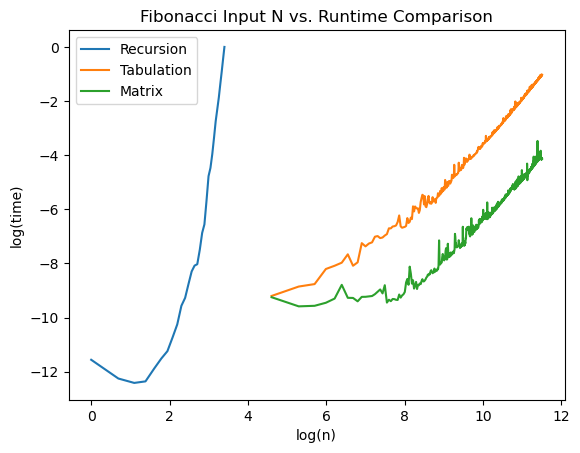

In [55]:
import math
# basic information for the plot
plt.title('Fibonacci Input N vs. Runtime Comparison')
plt.xlabel('log(n)')
plt.ylabel('log(time)')

# initialize two lists, one for n, one for time
plot_n = []
plot_time = []
# use context manager to read file
with open('recursion_runtime_n.txt', 'r') as file:
    # while file is not reached the eof
    for line in file:
        # read line by line, and split them into n and time
        r_n, r_time = line.split()
        # append both of these element into their corresponding list
        plot_n.append(int(r_n))
        plot_time.append(float(r_time))
# finish reading, just plot it
plt.plot(np.log(plot_n), np.log(plot_time), label = 'Recursion')

# same syntax for Tabulation
plot_n2 = []
plot_time2 = []
with open('tabulation_runtime_n.txt', 'r') as file:
    for line in file:
        r_n2, r_time2 = line.split()
        plot_n2.append(int(r_n2))
        plot_time2.append(float(r_time2))
        
plt.plot(np.log(plot_n2), np.log(plot_time2), label = 'Tabulation')

# Maxtrix
plot_n3 = []
plot_time3 = []
with open('matrix_runtime_n.txt', 'r') as file:
    for line in file:
        r_n3, r_time3 = line.split()
        plot_n3.append(int(r_n3))
        plot_time3.append(float(r_time3))
        
plt.plot(np.log(plot_n3), np.log(plot_time3), label = 'Matrix')

plt.legend()



### d) Discuss the complexity of each method.

### Recursion:
Above Recursion method actually has the worst runtime among, being O(2^n). Which means, for a give size amount of inputs, the execution time grows as an exponential curve. Once the input gets a little larger, the runtime growth increase trenmendously, making this method an extremely inefficient solution.

### Tabulation:
Tabulation method has linear growth rate, i.e., has a runtime of O(n), linear runtime. The runtime of the execution is directly porpotional to the given size amount of inputs, this is usually the type of solution we want when solving physics problems.

### Maxtrix:
   
Matrix method is quite efficient, which according to the graph, has a logarithmic time complexity, O(logn). An such advanced solution usually occurs in algorithm that n divides by some constant, but this method are often more complexed, involves more mathematical steps. This method is good for large amount of data input, of which can be processed fairly quicly.